In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/jakobgross/Students-Performance-in-Exams-Kaggle-/master/StudentsPerformance.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [ ]:
df.columns = ['gender', 'race', 'parents_degree', 'lunch', 'test_prep', 'math_score', 'reading_score', 'writing_score']

In [ ]:
df

,gender,race,parents_degree,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df2 = df.groupby('lunch')['reading_score', 'math_score', 'writing_score'].mean();

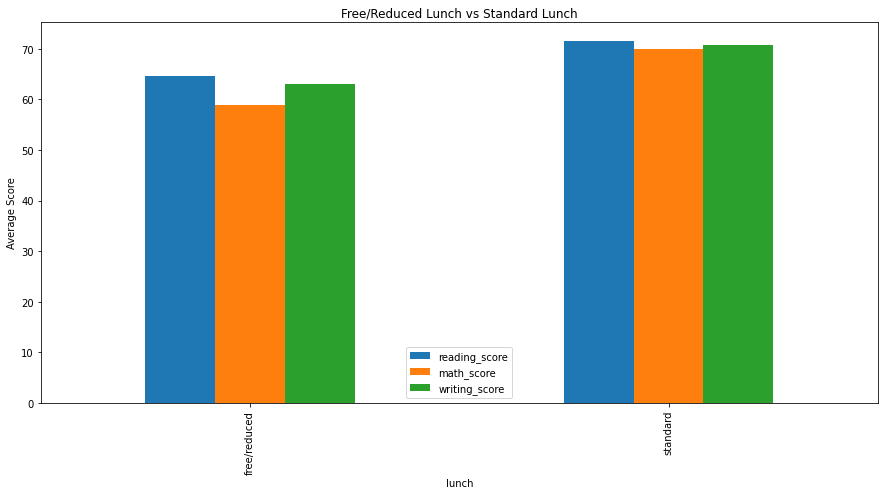

In [ ]:
df2.plot.bar(figsize=(15,7));
plt.title("Free/Reduced Lunch vs Standard Lunch");
plt.ylabel("Average Score");
plt.show();
#the bars on the left is free/Reduced Lunch and the bars on the right is standard lunch

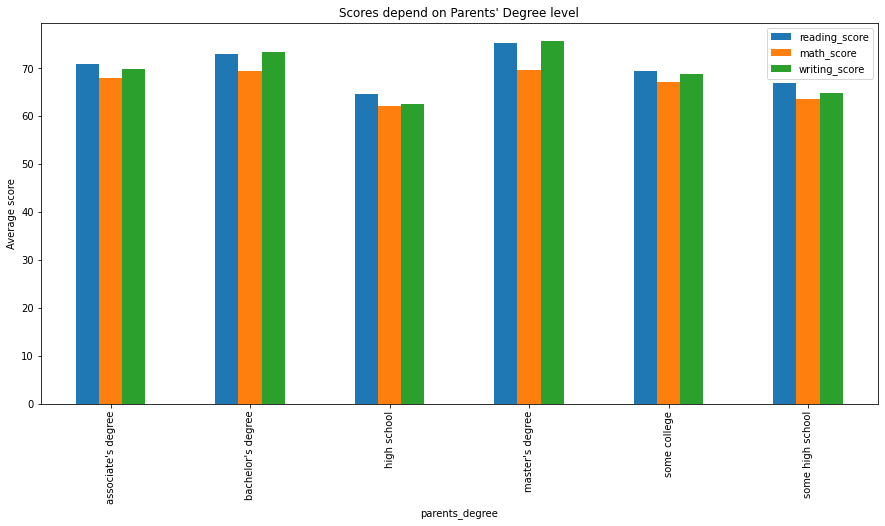

In [ ]:
df3 = df.groupby('parents_degree')['reading_score', 'math_score', 'writing_score'].mean()
df3.plot.bar(figsize=(15,7))
plt.ylabel("Average score")
plt.title("Scores depend on Parents' Degree level")
plt.show()
#starting from left to right: associaate degree, bachelor degree, high school degree, master degree, some college, some high school

In [ ]:
df.isnull().any()

gender            False
race              False
parents_degree    False
lunch             False
test_prep         False
math_score        False
reading_score     False
writing_score     False
dtype: bool

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing #transforming String to numerical data

In [ ]:
# Splitting data into features and labels
xdf = df[['parents_degree']]
ydf = df[['math_score']]
xdf

,parents_degree
0,bachelor's degree
1,some college
2,master's degree
3,associate's degree
4,some college
...,...
995,master's degree
996,high school
997,high school
998,some college


In [ ]:
# Encoding String data
le = preprocessing.LabelEncoder()
xdf = le.fit_transform(xdf)
xdf

array([1, 4, 3, 0, 4, 0, 4, 4, 2, 2, 0, 0, 2, 4, 3, 5, 2, 5, 3, 0, 2, 4,
       4, 5, 1, 3, 4, 1, 2, 3, 4, 4, 3, 4, 4, 0, 0, 5, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 2, 0, 2, 4, 0, 4, 2, 5, 2, 0, 0, 4, 5, 1, 5, 0, 0, 5, 5,
       5, 4, 0, 0, 4, 4, 0, 5, 5, 0, 5, 1, 5, 3, 0, 2, 4, 0, 2, 4, 4, 0,
       4, 5, 1, 2, 2, 0, 4, 0, 5, 4, 4, 1, 4, 1, 0, 2, 4, 4, 3, 0, 0, 5,
       0, 2, 0, 4, 1, 2, 1, 1, 5, 4, 1, 0, 4, 2, 4, 2, 5, 4, 3, 1, 3, 5,
       4, 4, 1, 1, 5, 2, 0, 4, 5, 4, 4, 2, 4, 4, 5, 0, 1, 0, 5, 1, 0, 1,
       5, 4, 2, 4, 0, 0, 0, 4, 3, 2, 3, 1, 2, 3, 2, 4, 2, 5, 4, 0, 1, 3,
       2, 0, 3, 5, 3, 4, 2, 0, 5, 0, 2, 5, 5, 1, 0, 4, 5, 4, 3, 0, 5, 2,
       4, 1, 0, 4, 0, 0, 4, 5, 1, 2, 4, 4, 5, 4, 2, 0, 2, 5, 0, 2, 2, 5,
       2, 0, 5, 5, 0, 3, 4, 2, 5, 4, 4, 0, 1, 5, 1, 0, 1, 5, 4, 0, 2, 1,
       2, 4, 5, 0, 0, 2, 2, 2, 5, 4, 5, 3, 2, 4, 0, 0, 4, 3, 5, 4, 5, 2,
       2, 5, 1, 2, 0, 4, 1, 4, 0, 4, 4, 1, 5, 2, 5, 1, 2, 2, 1, 4, 5, 0,
       0, 5, 1, 5, 0, 5, 5, 1, 2, 0, 5, 0, 2, 0, 4,

In [ ]:
# x values are now numerical

In [ ]:
# Re-shaping data into 2d array
xdf = xdf.reshape(-1,1) 

In [ ]:
#0: associate's
#1: bachelor's 
#2: college
#3: master's
#4: some college
#5: some highschool

In [ ]:
# Predicting data with knn
knn_1 = KNeighborsClassifier(n_neighbors = 1) #k=1
knn_1 = knn_1.fit(xdf, ydf)

In [ ]:
print(knn_1.predict([[0],[1],[2],[3],[4],[5]]))

[85 59 59 79 70 74]


In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3) #k=3
knn_3 = knn_3.fit(xdf,ydf)
print(knn_3.predict([[0],[1],[2],[3],[4],[5]]))

[55 59 41 79 59 53]


In [ ]:
# Predicting data with Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(xdf,ydf)
print(logreg.predict([[0],[1],[2],[3],[4],[5]]))

[65 65 65 62 69 69]


In [ ]:
# Train test split to test accuracy and R^2 score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xdf, ydf, test_size=0.2)

In [ ]:
# k=3 KNN 
y_pred = knn_3.predict(x_test)
accuracy_score(y_test, y_pred)

0.04

In [ ]:
# Logistic Regression prediction
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.065

In [ ]:
score = [] # accuracy score
score2 = [] # r^2

In [ ]:
# Create a list of k's and record accuracy score and r^2 accordingly
k = list(range(1,30))
for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn = knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(accuracy_score(y_test, y_pred))
  score2.append(r2_score(y_test, y_pred))

In [ ]:
score

[0.01,
 0.015,
 0.01,
 0.01,
 0.0,
 0.01,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

In [ ]:
score2

[-1.3628659401754772,
 -1.2278177480433734,
 -1.2278177480433734,
 -1.2278177480433734,
 -1.240106178683122,
 -1.240106178683122,
 -1.4406234759465906,
 -1.7077307824876162,
 -1.6589091796756414,
 -2.849599987711569,
 -2.849599987711569,
 -2.849599987711569,
 -1.5304826249997534,
 -0.7133850173932148,
 -0.889366968345563,
 -1.888528469771758,
 -2.0742041658402592,
 -2.318893389457419,
 -0.5018247385413237,
 -0.5018247385413237,
 -0.5524729999619098,
 -0.5524729999619098,
 -0.5524729999619098,
 -0.5524729999619098,
 -0.5524729999619098,
 -0.3519557026984417,
 -0.38267677929781363,
 -0.367980480492168,
 -0.367980480492168]

In [ ]:
#bad model :)
# trying with higher k 
knn35 = KNeighborsClassifier(n_neighbors=35)
knn35 = knn35.fit(x_train, y_train)
y_pred = knn35.predict(x_test)
accuracy_score(y_test, y_pred)

0.015

In [ ]:
# still bad model